In [6]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from pymongo import MongoClient
from datetime import datetime
from arctic import Arctic
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
# Using Arctic database to store
store = Arctic('localhost')
# Create the library - defaults to VersionStore
store.initialize_library('ETF')
# Access the library
library = store['ETF']

In [8]:
sector={'Consumer Discretionary':'XLY',
        'Consumer Staples':'XLP',
        'Energy':'XLE',
        'Financials':'XLF',
        'Health Care':'XLV',
        'Industrials':'XLI',
        'Materials':'XLB',
        'Real Estate':'XLRE',
        'Technology':'XLK',
        'Utilities':'XLU'
}

key_markets={'S&P 500 ETF':'SPY',
            'Treasuries ETF':'TLT'
}

In [15]:
for s in sector.keys():
    m = 'GOOG/NYSE_' + sector[s]
    try:
        data=quandl.get(m, authtoken=token)
    except:
        print s
    library.write(s, data, metadata={'source': 'Quandl','type':'sector','ticker':sector[s]})

Real Estate


In [49]:
for s in key_markets.keys():
    m = 'GOOG/AMEX_' + key_markets[s]
    try:
        data=quandl.get(m, authtoken=token)
    except:
        print s
    library.write(s, data, metadata={'source': 'Quandl','type':'key markets','ticker':key_markets[s]})

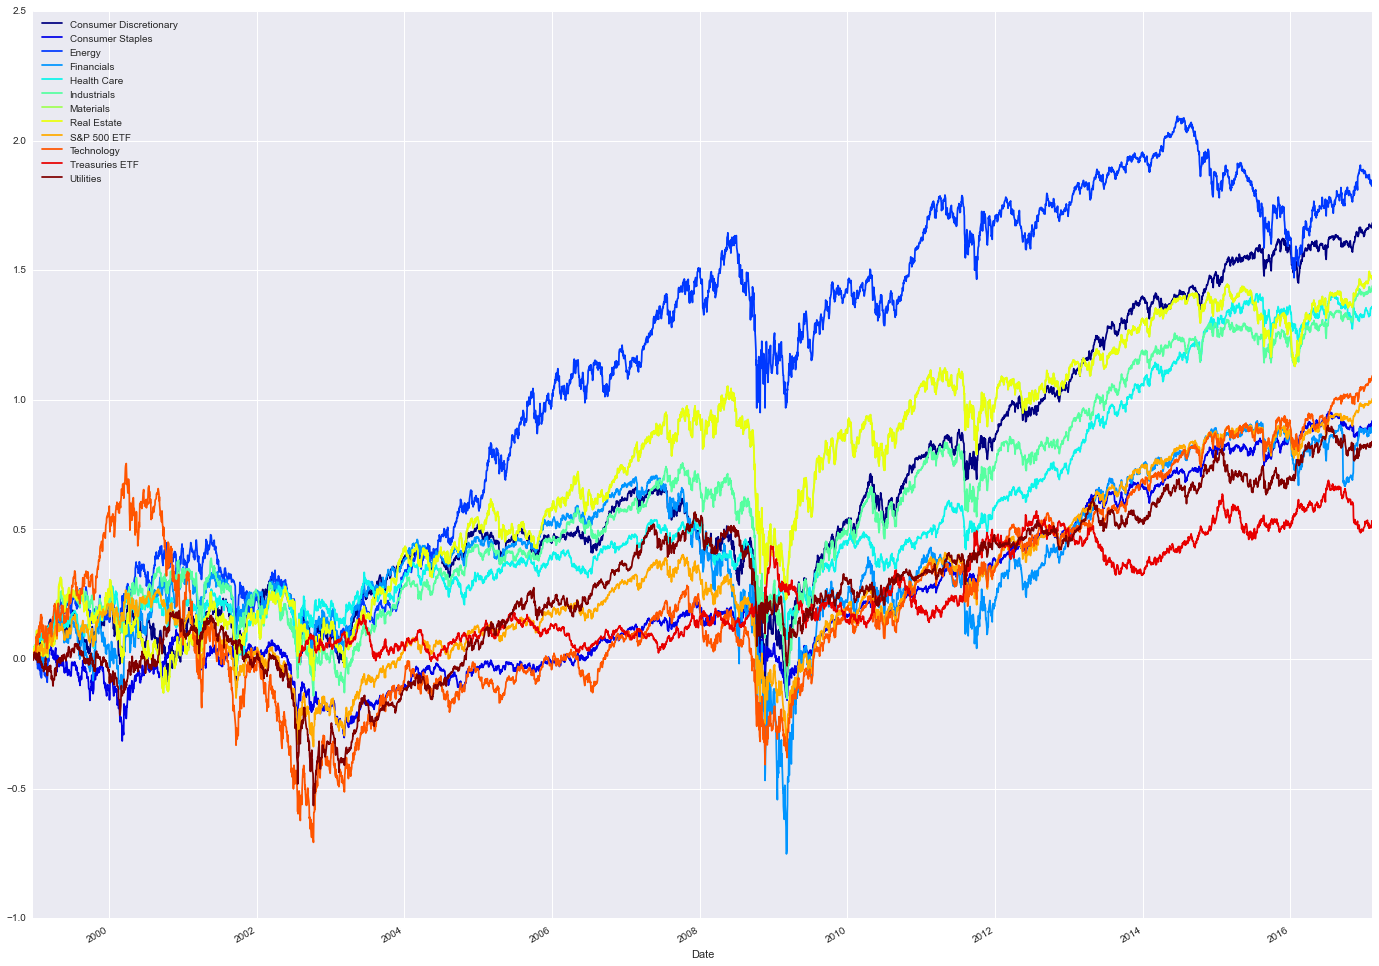

In [54]:
df = pd.DataFrame()
for m in library.list_symbols():
    df[m]=library.read(m).data.Close
df.pct_change().cumsum().plot(colormap='jet')

In [52]:
library.list_symbols()

[u'Consumer Discretionary',
 u'Consumer Staples',
 u'Energy',
 u'Financials',
 u'Health Care',
 u'Industrials',
 u'Materials',
 u'Real Estate',
 u'S&P 500 ETF',
 u'Technology',
 u'Treasuries ETF',
 u'Utilities']

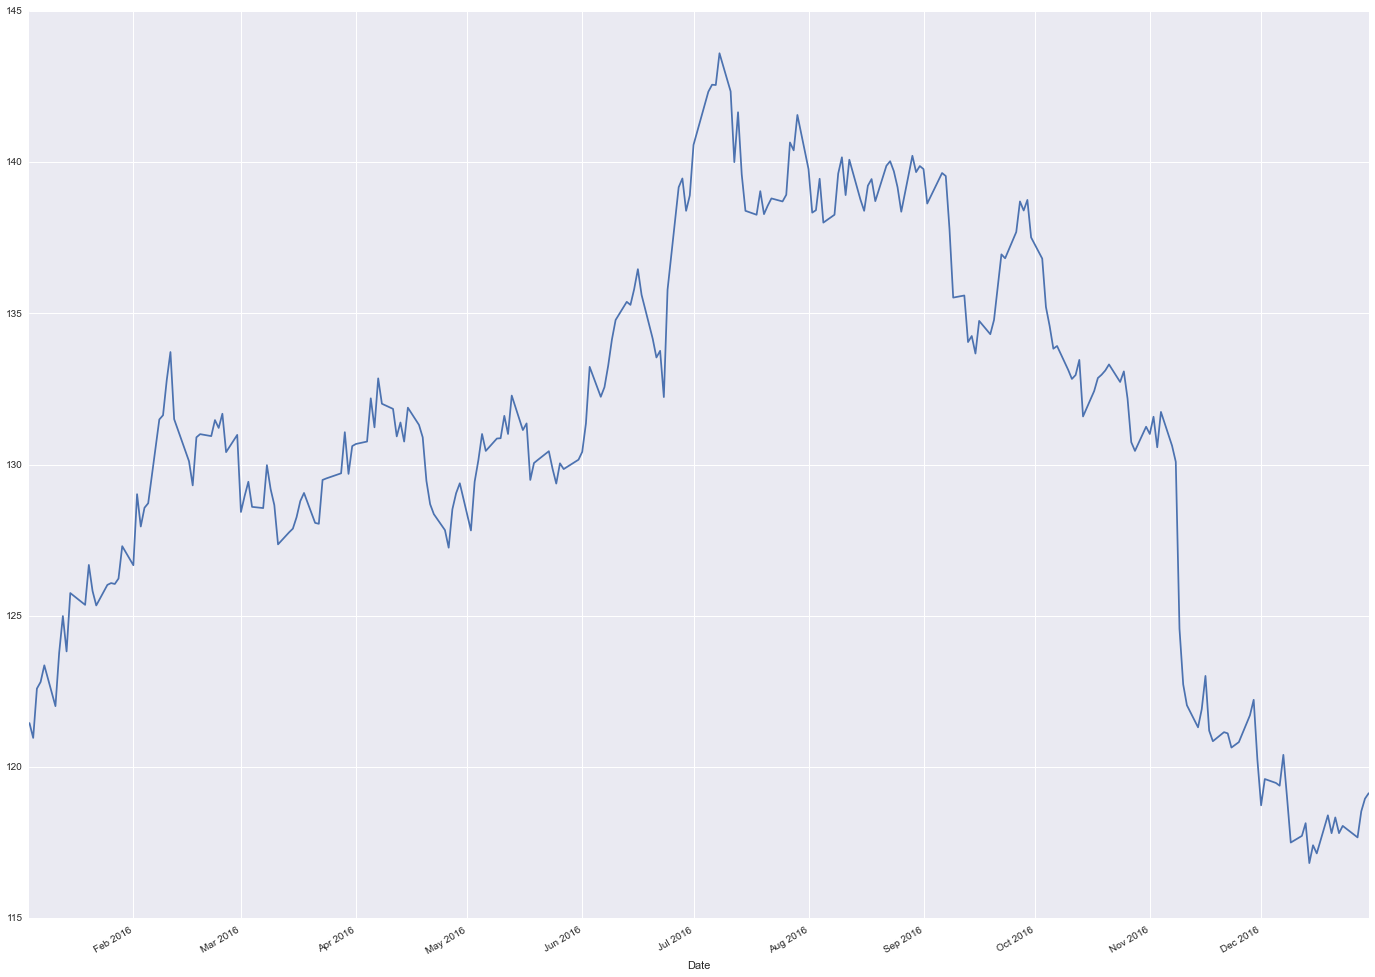

In [53]:
df['Treasuries ETF']['2016'].dropna().plot()